### 📡📏🎈 Revisiting the Radar Range Equation — With New Tricks! 📡📏🎈

It’s time to **revisit an old friend**, the **Radar Range Equation**! 

Remember all the way back in **Lesson 2**, when we explored **how far we can see with our radar**? 👀

Well, now that we’ve learned about **range compression** and **SAR beamforming**, we can **return to this topic with new insights!** 🧠   

### 🔍 What’s Different This Time?  

In **range compression**, we **combined all the samples** of the chirp pulse **coherently** to **concentrate the entire signal energy** to the correct time delay. 🐦🎵

When we combine signal samples **coherently**, the target echoes **add in phase**, while **noise adds randomly**.

This gives us a **processing gain** which is directly proportional to the number of **independent samples we sum**. ➕

✅ **How many samples do we add?**  

It's simply the product of the **chirp bandwidth** $B$ and **chirp duration** $T$, which is also known as the **time-bandwidth product**.  

Since we gain this much in **SNR**, we can **multiply the SNR in the radar equation** by this value! 📈 

### 🔍 What About SAR Beamforming?  
In **SAR beamforming**, we are combining signals from **multiple “virtual” antenna elements** to form the **synthetic aperture**.  

✅ **How does this give us a gain?**  
- Again, with **coherent** combination, signals from the target **add in phase**, while **noise adds randomly**.  
- This gives us an **SNR gain directly proportional to the number of virtual antenna elements (pulses)!** 🔄✨  

✅ **How many pulses do we add?**  
The number of pulses is the product of the **Pulse Repetition Frequency (PRF)** and the **duration of the collection**.  

### 📌 Putting It All Together  

We can **multiply the SNR by both these additional gain factors** to quantify what we should see in our SAR image! 

Let’s see how these **processing gains affect our radar’s range**. 📡📈💥 


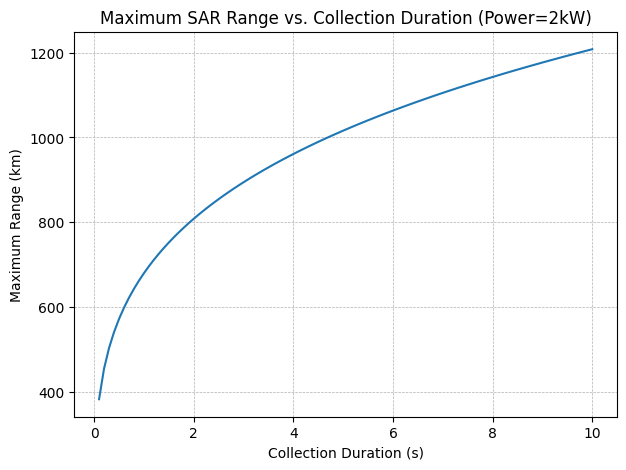

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
k = 1.38e-23   # Boltzmann's constant (J/K)
c = 3e8        # Speed of light (m/s)
T = 290        # Receiver noise temperature (K)
F = 10**(5/10) # Noise figure (5 dB)
L = 1.0        # System losses
SNR_min = 10   # Minimum SNR required for detection (unitless)
freq = 9.65e9  # Radar operating frequency (Hz)
sigma = 1.0    # Radar cross-section (m²)
lamb = c / freq  # Wavelength (m)

# Fixed radar parameters
PRF = 5e3            # pulse repetition frequency (Hz)
pulse_duration = 2e-5  # Pulse duration (s)
Pt = 2000.0          # Transmit power fixed at 2 kW

# Define antenna gain from the antenna size
antenna_width = 3.2
antenna_length = 0.4
G_linear = (4 * np.pi * antenna_width * antenna_length) / (lamb**2)

# ---------------------------------------------------
# We fix the bandwidth
B_fixed = 1200e6  # Hz

# Collection duration
collection_duration_values = np.linspace(0.1, 10, 100)  # 1 s to 10 s

# Compute relevant gains
G_chirp = B_fixed * pulse_duration  # Range compression gain (linear)
N_pulses_array = PRF * collection_duration_values   # pulses in total

# Compute R_max for each collection duration
#    Radar equation (monostatic, simplified):
#      R_max^4 = [ Pt * G^2 * λ^2 * σ * G_chirp * N_pulses ] 
#                / [ (4π)^3 * k * T * B * F * L * SNR_min ]
#    So R_max = [ ... ]^(1/4).
numerator = Pt * (G_linear**2) * (lamb**2) * sigma * G_chirp
denominator = (4 * np.pi)**3 * k * T * B_fixed * F * L * SNR_min

R_max_values = ( (numerator * N_pulses_array) / denominator ) ** 0.25
R_max_km = R_max_values / 1e3

# Plot R_max vs. collection duration
plt.figure(figsize=(7,5))
plt.plot(collection_duration_values, R_max_km)
plt.xlabel("Collection Duration (s)")
plt.ylabel("Maximum Range (km)")
plt.title("Maximum SAR Range vs. Collection Duration (Power=2kW)")
plt.grid(True, linestyle="--", linewidth=0.5)
plt.show()

✨ Beautiful! We can actually start to see clearly **hundreds of kilometers in distance!** 🌌📡  

### 📊 Why Bandwidth Doesn't Affect Maximum Range  
- In the **maximum range plot**, adjusting the bandwidth doesn't seem to affect the result.  
- Why? Because although increasing bandwidth increases noise, it also gives us a **processing gain** proportional to the bandwidth from the chirp.  
- This means the chirp bandwidth **cancels out** from the radar equation! ❌  

### 🌟📡 Understanding Noise-Equivalent Sigma Zero (NESZ) 📡🌟  

In **SAR imaging**, the target that we mostly see is the **surface of the ground**. 🌍 

When we improve our resolution, we are effectively making each pixel represent a **smaller and smaller mirror** that reflects microwave energy. 🪞 

### 🔍 What Happens With Higher Resolution?  
- As resolution increases, the **patch of ground** represented by each pixel gets smaller.  
- 🌊 For a **homogeneous surface**, the power reflected back to the radar from each pixel is **proportional to the size of that pixel**. 📏📡  
- Therefore, with **finer resolution**, we receive **less energy per pixel** when imaging a homogeneous area.  

### 📏 **Normalized Backscatter (Sigma Nought)**  

To make sense of this, we often **normalize the backscatter** by **dividing the measured radar cross-section by the surface area of the pixel**. This process makes the pixel power values (representing the strength of the backscatter) **independent of pixel size**.  

### 💡 **Why do we do this?**  
✅ We want to measure a **true physical property of the reflecting area**, not just the power received from a particular pixel size. 📐📡   

### 🔑 Noise-Equivalent Sigma Zero (NESZ)  
NESZ is a metric that describes the **performance of the SAR system**:  
- It tells us how **strong a backscatterer** (in terms of normalized backscatter) would have to be to produce the same echo power at our receiver as the **system noise**.  
- 📉 A **smaller NESZ value** means **better performance**!

### The Party Conversation 🔊

Imagine you're at a **lively party** 🎈 with background music playing and people talking loudly. You're trying to hear a friend speaking across the room.

- 🗣️ Your **friend’s voice** = the **target signal**  
- 🎶 The **background music and other people talking** = the **system noise**  
- 🧠 **NESZ** = the **volume your friend must speak at** so that you start hearing their voice

---

➡️ If the **NESZ is low**, your friend can speak **quietly** and still be heard over the music — that’s a **good thing**! ✔️  
➡️ If the **NESZ is high**, your friend has to **shout** just to be heard — **faint signals are drowned out**. ❌

---

So, NESZ tells us how **loud a target has to be** to **stand out from the noise**:  
- **Lower NESZ** = better sensitivity to **weak reflectors**  
- **Higher NESZ** = system only picks up **strong reflections**

Keep your radar party quiet, and even whispers make it into the image. 😉


### 📊 **Why Bandwidth Affects NESZ**  

- **NESZ** (Noise-Equivalent Sigma Nought) represents the **normalized backscatter** — in other words, the **radar cross-section divided by the pixel area**. 📏📡  
- When we **increase the bandwidth** of the transmitted chirp, we get **finer range resolution**, which means **smaller range pixels**. ✅  

But here's the twist:  
📉 Increasing the chirp bandwidth does **not** change the **total Signal-to-Noise Ratio (SNR)**.  
That’s because the **processing gain** and the **wider noise bandwidth** **cancel each other out**. ⚖️

Now here’s the catch:  
Imagine a **homogeneous surface** (like a field or the ocean 🌾🌊), and you divide it into **smaller and smaller range pixels**.  
Each pixel becomes a **tinier mirror**, reflecting **less energy** back to the radar. 🪞💡  

- So even though the **total SNR remains constant**, the **SNR per pixel decreases** as the pixels get smaller.  
- To keep the SNR per pixel the same, we’d need a **stronger backscatter** — meaning the **NESZ must increase**.

---

### 📊 **What About the Synthetic Aperture?**  

- When we **increase the number of pulses** — **lengthen the synthetic aperture** — we get more **coherent integration gain**, which results in a **higher total SNR**. 📈💪  
- At the same time, a **longer aperture** improves the **cross-range resolution**, meaning the **cross-range pixel size becomes smaller**. 🖼️📏
- With a longer collection, we get **more signal energy** — but that energy is now being **spread over a greater number of smaller pixels** in the cross-range direction. ➗📦
- The **improvement in SNR** and the **reduction in pixel size** happen **at the same rate**. ⚖️
- While both resolution and energy improve, the **SNR per pixel stays roughly constant**.  
- And so, the **NESZ remains unchanged** as we increase aperture length.

✅ **Conclusion:** Extending the synthetic aperture increases both SNR and resolution, but these effects balance out — so **NESZ does not depend on aperture length**.   

---

### 💡 What NESZ Tells Us — And What It Doesn't  
Even though **NESZ** provides valuable information about the **image quality**, it's not the **whole story**.  
- It says **nothing about resolution**, i.e., how much **information is contained in the image**.  
- From an NESZ plot, you can clearly see that **lower bandwidths (worse range resolutions)** produce the **best NESZ values**. But that doesn't mean they're the best images! 📉📸  

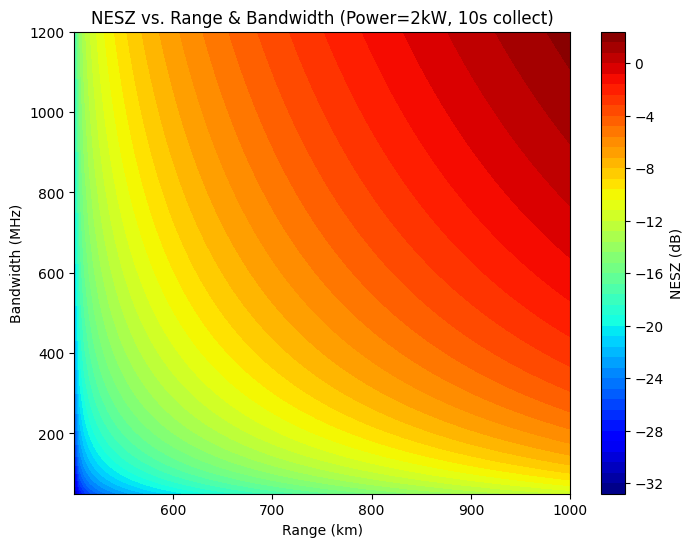

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# --- Constants & Fixed Parameters ---
c = 3e8
k = 1.38e-23  # Boltzmann's constant
T = 290       # Noise temperature (K)
F = 10**(5/10) # Noise figure (unitless) => 5 dB
L = 1.0       # System losses
Pt = 2000.0   # 2 kW
freq = 9.65e9
lamb = c / freq
collection_duration = 5 # s

# Antenna: area = 3.2 * 0.4
antenna_area = 3.2 * 0.4
G_linear = 4 * np.pi * antenna_area / lamb**2

pulse_duration = 20e-6
PRF = 5000.0

orbit_height = 500e3  # 500 km orbit altitude (assume R >= 500 km)
velocity = 7.5e3      # 7.5 km/s platform velocity (low Earth orbit scale)
aperture_length = velocity*collection_duration

# Number of pulses
N_pulses = int(collection_duration * PRF)

# 1) Define Range & Bandwidth axes
R_values = np.linspace(orbit_height+1e3, 1000e3, 100)   # 200 km to 1000 km
B_values = np.linspace(50e6, 1200e6, 100)    # 50 MHz to 1200 MHz

# 2) Meshgrid
R_grid, B_grid = np.meshgrid(R_values, B_values)  # shape [100, 100]
incidence_angle_grid = np.acos(orbit_height / R_grid)

# 3) Gains
G_chirp = B_grid * pulse_duration

# 4) Resolutions
delta_r_grid = c / (2.0 * B_grid) * (1/np.sin(incidence_angle_grid)) # ground range resolution (m)

# Cross-range: compute angle from geometry
theta_grid = 2.0 * np.arctan((aperture_length / 2.0) / R_grid)
delta_cr_grid = lamb / (2.0 * theta_grid) # cross-range resolution (m)

# 5) NESZ formula with delta_r * delta_cr
NESZ_grid = (
     (4.0 * np.pi)**3 * k * T * B_grid * F * L * (R_grid**4)
) / (
    Pt * (G_linear**2) * (lamb**2) * G_chirp * N_pulses * delta_r_grid * delta_cr_grid
)

# Convert to dB
NESZ_dB = 10.0 * np.log10(NESZ_grid)

# 6) Plot
plt.figure(figsize=(8,6))
plt.contourf(R_values/1e3, B_values/1e6, NESZ_dB, levels=50, cmap='jet')
plt.colorbar(label="NESZ (dB)")
plt.xlabel("Range (km)")
plt.ylabel("Bandwidth (MHz)")
plt.title("NESZ vs. Range & Bandwidth (Power=2kW, 10s collect)")
plt.show()

### 

###